### import librairies

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

### import data

In [3]:
data=pd.read_csv("C:/Users/onkar/Desktop/My_Folders/python files/abalone.csv")

In [4]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### EDA

### scatter plot

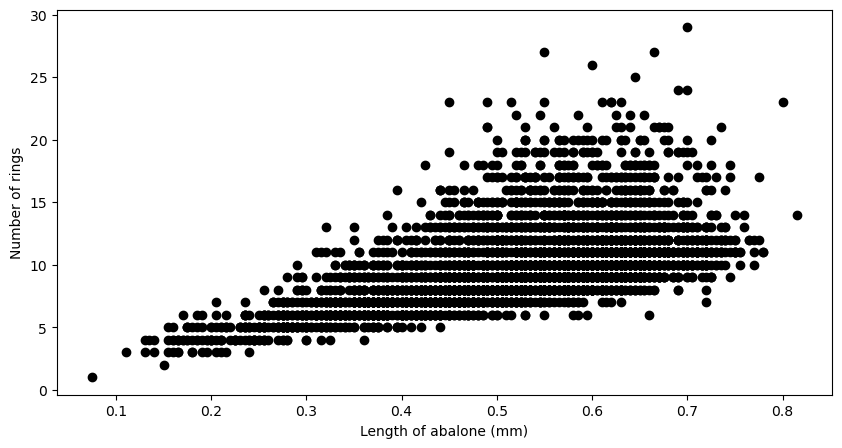

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(data['Length'],data['Rings'],c='black')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

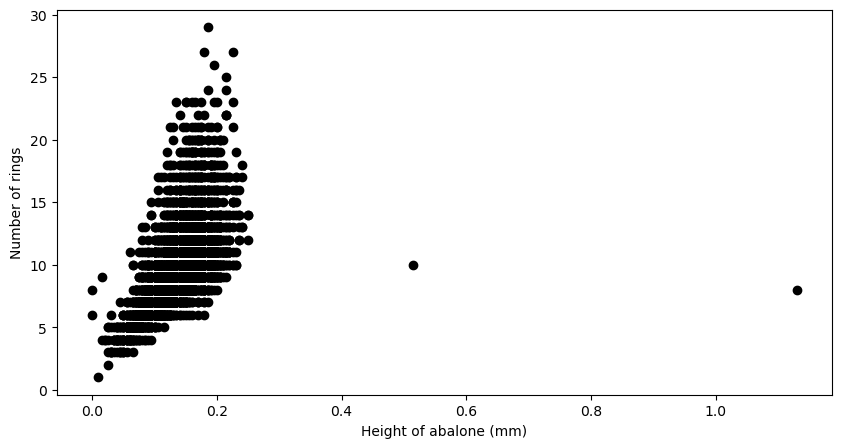

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(data['Height'],data['Rings'],c='black')
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

## Feature Engineering

### One-hot encoding

In [10]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


## modeling

### split dataset

In [11]:
training_set=encoded_data.iloc[:4099,:]
validating_set=encoded_data.iloc[4099:,:]

In [12]:
print(training_set.shape)
print(validating_set.shape)

(4099, 11)
(78, 11)


## Baseline model: Multiple linear Regression

In [13]:
X=training_set[['Length','Height']]
y=training_set['Rings'].values.reshape(-1,1)

X_val= validating_set[['Length','Height']]
y_val=validating_set['Rings'].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,
                                               random_state=2023) 


In [14]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [15]:
# Test RMSE
lin_reg_pred=lin_reg.predict(X_test)
test_rmse=mean_squared_error(y_test,lin_reg_pred,squared=False)

In [16]:
print(f'Test RMSE:{test_rmse}')

Test RMSE:2.494492765170757


In [17]:
# validation RMSE 
lin_reg_pred_val=lin_reg.predict(X_val)
val_rmse=mean_squared_error(y_val,lin_reg_pred_val,squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.581917388245952


### Multiple linear regression with regularization (ridge regression)

In [18]:
ridge=Ridge()

parameters = {'alpha':[1,2,10,15,20]}

ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_root_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

print(ridge_regressor.best_params_)

print(-ridge_regressor.best_score_)

{'alpha': 2}
2.667237812184864


In [19]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train,y_train)

# Test RMSE
ridge_reg_pred = ridge_reg.predict(X_test)
test_rmse=mean_squared_error(y_test,ridge_reg_pred,squared=False)
print(f'Test RMSE:{test_rmse}')

# Validation RMSE
ridge_reg_pred_val = ridge_reg.predict(X_val)
val_rmse = mean_squared_error(y_val,ridge_reg_pred_val,squared=False)
print(f'Validation RMSE:{val_rmse}')

Test RMSE:2.5028834342621447
Validation RMSE:1.5805068516587784


### multiple linear regression with regularization(lasso)

In [20]:
lasso=Lasso(tol=0.06)

parameters={'alpha':[0.00001,0.001,0.01,1,2,5,10,15,20]}

lasso_regressor = GridSearchCV(lasso,parameters,
                               scoring='neg_mean_squared_error',cv=6)

lasso_regressor.fit(X_train,y_train)

print(lasso_regressor.best_params_)

print(-lasso_regressor.best_score_)

{'alpha': 0.01}
7.215331138312805


In [21]:
lasso_reg = Lasso(alpha=0.06)
lasso_reg.fit(X_train,y_train)

# Test RMSE
lasso_reg_pred = lasso_reg.predict(X_test)
test_rmse=mean_squared_error(y_test,lasso_reg_pred,squared=False)
print(f'Test RMSE:{test_rmse}')

# Validation RMSE
lasso_reg_pred_val = lasso_reg.predict(X_val)
val_rmse = mean_squared_error(y_val,lasso_reg_pred_val,squared=False)
print(f'Validation RMSE:{val_rmse}')

Test RMSE:2.5576786215600777
Validation RMSE:1.5283831724932164


## Tree-based models

In [25]:
X=training_set.drop(['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'],axis=1)
y=training_set['Rings'].values.reshape(-1,1)

X_val=validating_set.drop(['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'],axis=1)
y_val = validating_set['Rings'].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,
                                               random_state=2023) 

## Random Forest

In [28]:
rf = RandomForestRegressor()
parameters = {'n_estimators':[int(x) for x in np.linspace(100,1000,10)]}

rf_regressor=GridSearchCV(rf,parameters,scoring='neg_mean_squared_error',cv=5)

rf_regressor.fit(X_train,y_train.ravel())
print(rg_regressor.best_params_)
print(-rf_regressor.best_score_)

NameError: name 'rg_regressor' is not defined

In [ ]:
rf_reg